In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

In [2]:
# Load data
Matrix_Data = pd.read_csv("C:\Project\Files\FinalFiles\Model-Matrix_Update_MissingValues.csv")

In [3]:
# Define features and target
features = ['SumPopulation',
            'SumPopulation_CompletedFromExternalData',
            'NumberOfCities_smaller35km',
            'Jewish_precent',
            'Arab_precent',
            'Jewish_Arabs_precent_CompletedFromExternalData',
            'precentPopulation_over20',
            'ClalitPrecent_fromTatal',
            'ClalitPrecent_fromTatal_CompletedFromExternalData',
            'MacabiPrecent_fromTatal',
            'MacabiPrecent_fromTatal_CompletedFromExternalData',
            'MeuhedetPrecent_fromTatal',
            'MeuhedetPrecent_fromTatal_CompletedFromExternalData',
            'LeumitPrecent_fromTatal',
            'LeumitPrecent_fromTatal_CompletedFromExternalData',
            'SocioeconomicStatusֹ',
            'SocioeconomicStatusֹ_CompletedFromExternalData',
            'periphery',
            'Jerusalem_district',
            'North_district',
            'Center_district',
            'Haifa_district',
            'TLV_district',
            'South_district']
X = Matrix_Data[features]
y = Matrix_Data['Clinic_hours_for_1000_people_bigger9']


In [4]:
# Normalize the feature values
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, precision_score, recall_score

# Define the stratified cross-validation strategy
stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the parameter grid for RandomForestClassifier
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced']
}

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=stratified_cv, scoring='f1', n_jobs=-1, verbose=1)

# Fit the grid search to the data
grid_search_rf.fit(X_normalized, y)

# Print the best parameters and the best score
print("Best parameters found: ", grid_search_rf.best_params_)
print("Best F1 score: ", grid_search_rf.best_score_)



Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters found:  {'class_weight': 'balanced', 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Best F1 score:  0.4042678889737713


In [6]:
 #Use the best estimator to predict on the test set
best_rf = grid_search_rf.best_estimator_
y_pred = best_rf.predict(X_normalized)
y_pred_proba = best_rf.predict_proba(X_normalized)[:, 1]

# Evaluate the results
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, precision_score, recall_score

accuracy = accuracy_score(y, y_pred)
roc_auc = roc_auc_score(y, y_pred_proba)
conf_matrix = confusion_matrix(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)

print(f"Test Set Evaluation:\nAccuracy: {accuracy}\nROC-AUC Score: {roc_auc}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Precision: {precision}\nRecall: {recall}")


Test Set Evaluation:
Accuracy: 0.9604743083003953
ROC-AUC Score: 0.9879879879879879
Confusion Matrix:
[[210   6]
 [  4  33]]
Precision: 0.8461538461538461
Recall: 0.8918918918918919


In [7]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [8]:
import shap

In [38]:
# SHAP explanations using TreeExplainer
explainer = shap.TreeExplainer(best_rf)
shap_values = explainer.shap_values(X_normalized)


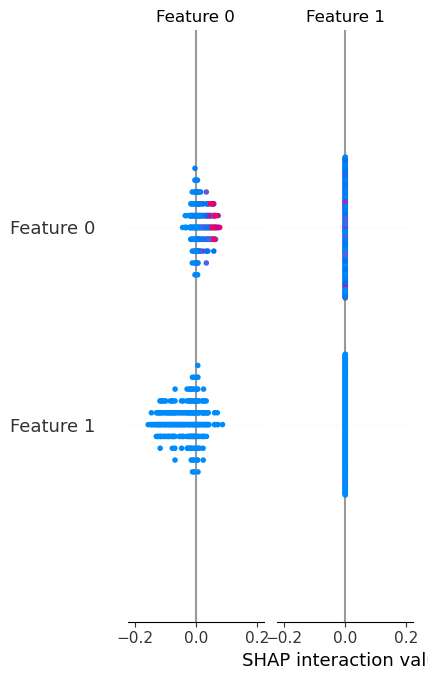

In [39]:

# Plot the SHAP values, showing all features
shap.summary_plot(shap_values, X_normalized, plot_type="bar")